In [2]:
import h5py
import numpy as np

file = h5py.File(f"{PROJ_DIR}/data/empirical/HCP_unrelated-445_rfMRI_hemi-L_nsubj-384_parc-None_fsLR4k_hemi-L_FCandPhase.h5")
fc = file["fc"][:]
phase_map = file["phase_map"][:]

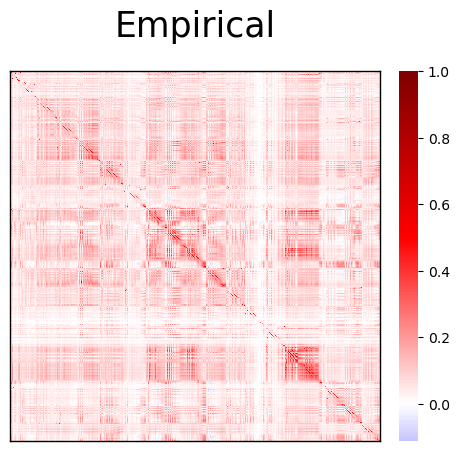

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

vmin = np.nanpercentile(fc, 5)
vmax = np.nanpercentile(fc, 95)
sns.heatmap(fc, cmap="seismic", center=0, square=True, cbar=True, xticklabels=[], yticklabels=[], cbar_kws=dict(fraction=0.046, pad=0.04))
plt.title("Empirical", fontsize=25, pad=25)
# Set frame around heatmap
for _, spine in plt.gca().spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

In [4]:
bold_data = h5py.File(f"{PROJ_DIR}/data/empirical/HCP_unrelated-445_rfMRI_hemi-L_nsubj-384_parc-None_fsLR4k_hemi-L_BOLD.hdf5", 'r')
bold_emp = bold_data['bold'][:]
medmask = np.where(bold_emp[:, 0, 0] != 0, True, False)

In [12]:
bold_data.close()

In [15]:
# add medmask to h5 file
with h5py.File(f"{PROJ_DIR}/data/empirical/HCP_unrelated-445_rfMRI_hemi-L_nsubj-384_parc-None_fsLR4k_hemi-L_BOLD.hdf5", 'a') as f:
    f.create_dataset('medmask', data=medmask)

BlockingIOError: [Errno 11] Unable to open file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')

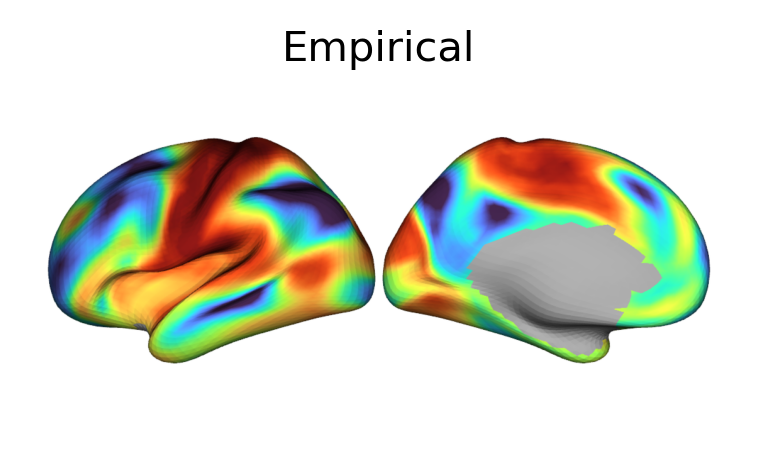

In [10]:
from heteromodes.plotting import plot_brain
from heteromodes.utils import unmask
from neuromaps.datasets import fetch_fslr

surf = fetch_fslr("4k")["inflated"][0]

fig = plot_brain(surf, unmask(phase_map, medmask), clim_q=[5, 95], cbar=False,
                 cbar_kws=dict(fontsize=25), cmap="turbo", dpi=300, labels=["Empirical"])
